## Data Analysis project online Retail

In [2]:
# Introduction
# Project Overview
# Data Cleaning
# Sales Analysis
# Customer Segmentation
# Churn Analysis
# Large Scale Data Analysis using Fireducks

In [3]:
!pip install openpyxl

import pandas as pd
from matplotlib import pyplot as plt

In [4]:
##Data load

In [5]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip


--2025-04-28 21:27:35--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  31.7MB/s    in 0.7s    

2025-04-28 21:27:37 (31.7 MB/s) - ‘online+retail.zip’ saved [23715478]



In [6]:


!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [7]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','	Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [8]:
df1.shape

(541909, 8)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), string(3)
memory usage: 33.1+ MB


##Data Cleaning Handle missing Values

In [10]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
df1[df1['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [12]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [14]:
most_freq = df1[['StockCode','Description']].value_counts().reset_index()
most_freq  # this shows the most freq product

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [15]:
most_freq[most_freq.StockCode=='85123A'].reset_index().head(1)

,index,StockCode,Description,count
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [16]:
most_freq.groupby("StockCode").head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


##merge data

In [17]:
most_freq.columns = ["StockCode", "freq_Description","count"]
df2 = df1.merge(most_freq,on="StockCode",how= "left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [18]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [19]:
df2.isnull().sum()  # i don't understasn how this working

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171188
Country,0
freq_Description,112
count,112


## drop null values

In [20]:
df2.dropna(subset=["Description"],inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171076
Country,0
freq_Description,0
count,0


In [21]:
## drop the 2 columns from the data

In [22]:
df2.drop(columns= ["freq_Description","count"],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df2 = df2.drop(2)

In [24]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710918.000000,710918,710918.000000,539842.000000
mean,9.718411,2011-07-05 11:54:21.643930880,4.410163,15290.157820
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114583,NaN,84.525666,1709.390615


In [26]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
196,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
209,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
304,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
305,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
306,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
710559,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
710781,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
710782,C581568,21258,?,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
710783,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [27]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [28]:
df3 = df2[(df2.UnitPrice>0)&(df2.Quantity>0)]
df3.head()
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693944.000000,693944,693944.000000,527364.000000
mean,10.873896,2011-07-05 15:59:40.075625216,3.874303,15296.792324
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:45,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669523,NaN,31.507567,1708.783285


In [29]:
df3.Quantity.quantile(0.9999)

np.float64(1530.1424999989104)

In [30]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6336,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6472,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33829,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
42702,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
68298,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
672274,579498,23084,add stock to allocate online orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672275,579498,23084,allocate stock for dotcom orders ta,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672276,579498,23084,for online retail orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672277,579498,23084,temp adjustment,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


##Feature engineering : create new columns

In [31]:
df4 = df3.copy()
df4['Totalprice'] = df4.Quantity * df4.UnitPrice
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [32]:
# need to analyse the monthly sales
df4['month'] = df4['InvoiceDate'].dt.month
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
5,536365,71053,WHITE MOROCCAN METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


## visulalization & EDA

##### 1. plot montly sales

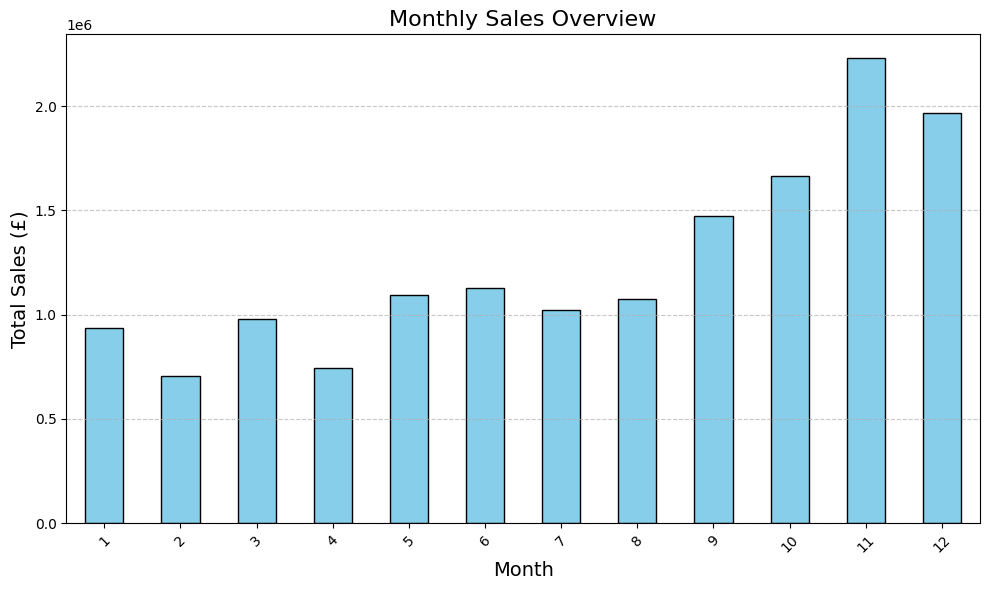

In [33]:
import matplotlib.pyplot as plt

# Grouping the sales by month and summing the Totalprice
monthly_sales = df4.groupby("month")["Totalprice"].sum()


# Plotting
plt.figure(figsize=(10, 6))  # Bigger size
monthly_sales.plot(kind="bar", color="skyblue", edgecolor="black")

# Titles and labels
plt.title("Monthly Sales Overview", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales (£)", fontsize=14)
plt.xticks(rotation=45)  # Tilt month names for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


##insight

TOTAL sales started rising up in august having in novemebr this likely due to holiday

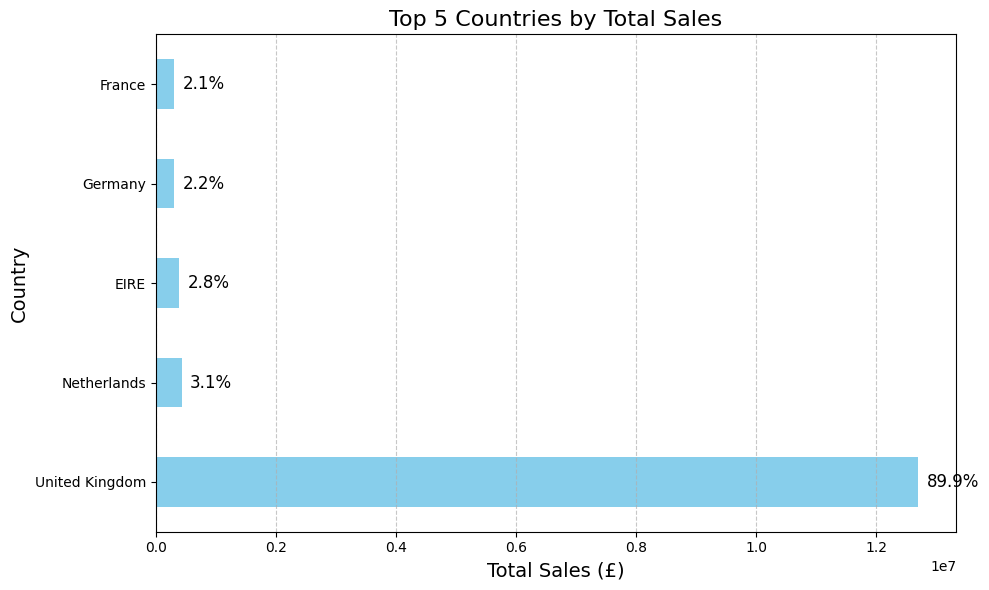

In [39]:
import matplotlib.pyplot as plt

# 1. Group by country and sum total sales
country_sales = df4.groupby('Country')['Totalprice'].sum().sort_values(ascending=False)

# 2. Get the top 5 countries
top_5_countries = country_sales.head(5)

# 3. Calculate percentage share for the top 5 countries
total_sales_top5 = top_5_countries.sum()
top_5_percentages = (top_5_countries / total_sales_top5) * 100

# 4. Plotting
plt.figure(figsize=(10, 6))
bars = top_5_countries.plot(kind='barh', color='skyblue')  # Horizontal bar chart

# Add percentage labels next to bars
for index, value in enumerate(top_5_countries):
    percentage = top_5_percentages.iloc[index]
    plt.text(value + (total_sales_top5 * 0.01), index, f'{percentage:.1f}%', va='center', fontsize=12)

plt.title('Top 5 Countries by Total Sales', fontsize=16)
plt.xlabel('Total Sales (£)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
